# Are Netflix Movies Getting Shorter?


## Introduction
In this project, I will investigate the claim that Netflix movies are getting shorter over time. By analyzing a dataset of Netflix movies, I aim to uncover trends in movie durations and explore other related insights

## Problem Statement
My friend suspects that movies on Netflix are getting shorter. To explore this, I will perform exploratory data analysis on a dataset of Netflix movies, focusing on trends in movie duration over the years.  

## Project Objectives 
- Analyze the trend of movie durations on Netflix over the years.
- Determine if movies are indeed getting shorter .
- Explore other insights related to Netflix movies from different decades.

## About the Data
The dataset 'netflix_data_csv' includes information about Netflix movies and TV shows, such as title, genre, release year, duration, and more. I will focus on the movie-related data to analyze trends in movie durations.

## Import Libraries and Load the Dataset
In this section, we'll start by importing the necessary Python libraries and loading the Netflix dataset.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt 

In [15]:
# Load the Netflix dataset
netflix_df = pd.read_csv(r"E:\Owner\Areas\Data Analytics Projects\Python Projects\Are Netflix Movies Getting Shorter\Data Sources\netflix_data.csv")

In [16]:
# Display the first few rows of the dataset
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## Data Overview 

Let's take a look at the structure of our data to understand its columns and data types. This will help us decide how to filter and clean the data. 

In [17]:
# Get the basic information of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [18]:
# Summary statistics
netflix_df.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7787.000000,7787,7787
unique,7787,2,7787,4049,6831,81,1565,NaN,NaN,7769,35
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,NaN,Multiple women report their husbands as missin...,Dramas
freq,1,5377,1,18,18,2883,118,NaN,NaN,3,1384
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,69.122769,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,50.950743,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,88.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,106.000000,NaN,NaN


## Filter the Dataset

We will filter out TV shows from our dataset to focus exclusively on movies. We will also create a subset of the data that contains only the relevant columns for our analysis.

In [19]:
# Filter out TV shows
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Subset to keep only relevant columns
netflix_movies = netflix_subset[["title", "country", "genre","release_year", "duration"]]

# Display the first few rows of the filtered dataset
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## Analyze Movie Durations 

Now, we will investigate the durations of movies to see if there are any patterns or trends, particularly in relation to their release year.

In [20]:
# Filter movies that are shorter than 60 minutes
short_movies = netflix_movies[netflix_movies["duration"] < 60]

# Display the results
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


## Visualize Movie Durations by Release Year

We'll create a scatter plot to visualize the relationship between movie duration and release year. We will color the points based on the genre.

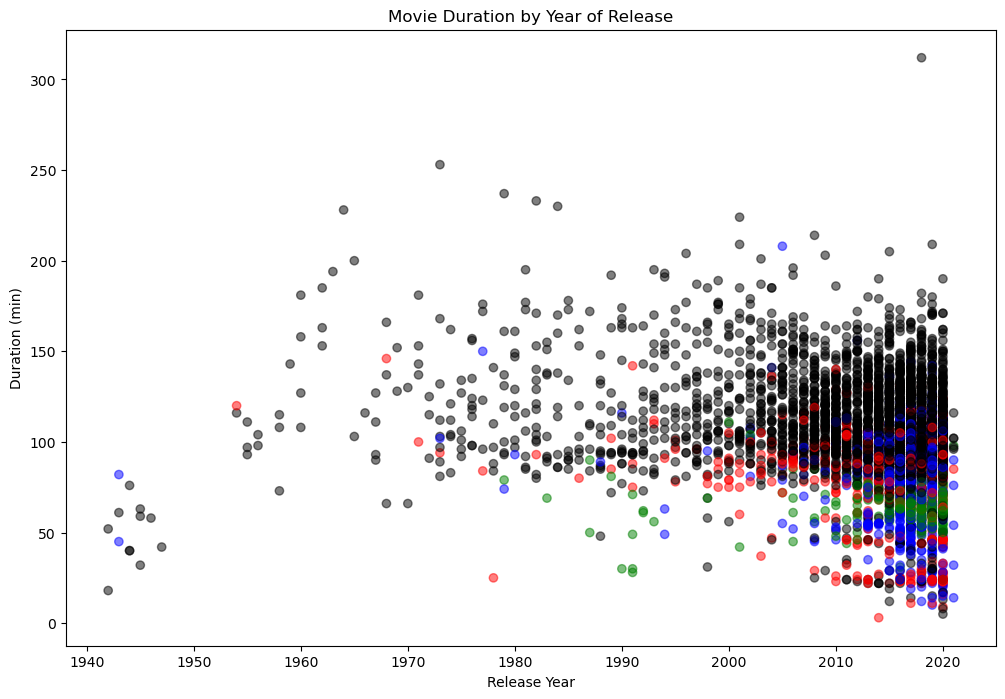

In [25]:
# Assign colors to genres
colors = []
for genre in netflix_movies["genre"]:
    if "Children" in genre:
        colors.append("red")
    elif "Documentaries" in genre:
        colors.append("blue")
    elif "Stand-Up" in genre:
        colors.append("green")
    else:
        colors.append("black")

# Create a scatter plot
plt.figure(figsize=(12,8))
plt.scatter(netflix_movies["release_year"],
            netflix_movies["duration"], c=colors, alpha = 0.5)
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release Year")
plt.ylabel("Duration (min)")
plt.show()    
answer = "no"

In [27]:
# Are we certain that movies are getting shorter?
are_movies_getting_shorter = "Maybe"
print(are_movies_getting_shorter)

Maybe


## Additional Analysis: Focus on the 1990s

In this section, we will focus on movies from the 1990s to understand more about this particular decade. Specifically, we will determine the most common movie duration and the number of short action movies during this time.

In [28]:
# Filter movies from the 1990s
movies_90s = netflix_movies[(netflix_movies["release_year"] >= 1990) & (netflix_movies["release_year"] < 2000)]

# Most frequent movie duration in the 1990s
duration = movies_90s["duration"].mode()[0]

# Count short movie duration in the 1990s
short_movie_count = movies_90s[(movies_90s["duration"] < 90) & (movies_90s["genre"].str.contains("Action"))].shape[0]

# Display results
print(f"The most frequent movie duration in the 1990s was {duration} minutes.")
print(f"There were {short_movie_count} short action movies released in the 1990s.") 


The most frequent movie duration in the 1990s was 94 minutes.
There were 8 short action movies released in the 1990s.


### Result Interpretation
From the scatter plot, we notice that non-typical genres such as children's movies and documentaries are clustered around the bottom half of the plot, indicating shorter durations. Additionally, more of these movies have been released in the past two decades, suggesting a trend toward shorter movies. Therefore, from the analysis above, it seems that Netflix movies might indeed be getting shorter, but this is open to further analysis.

The most frequent movie duration in the 1990s was 94 minutes. 
There were 8 short action movies released in the 1990s.

# Conclusion

In conclusion, our analysis provides some evidence that Netflix movies may be getting shorter over time, particularly in specific genres like children's movies and documentaries. However, this trend is not definitive and warrants further investigation.

We also found that the most frequent movie duration in the 1990s was 94 minutes, and there were 8 short action movies released during that decade. These insights suggest that while some movies are shorter, the overall trend might vary depending on the genre and time period.

For further exploration, it would be interesting to analyze movies by different genres or compare durations across different decades to see if the trend holds true across the board.